In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


1.0890873786407764
1.666282651072125
1.5372100192678229
[   40.81320341 -1048.50182013]
[   40.37216666 -1006.20531293]


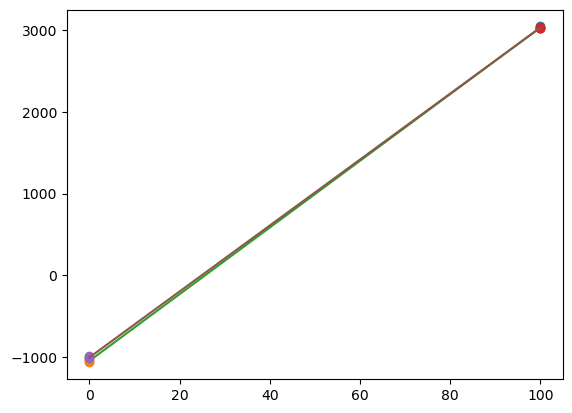

In [29]:
# Data paths
vch = [
    "./Data/Volt/Boiling Water/Trial 1 Commercial.csv",
    "./Data/Volt/Boiling Water/Trial 2 Commercial.csv",
    "./Data/Volt/Boiling Water/Trial 3 Commercial.csv",
]
vcc = [
    "./Data/Volt/Ice Water/Trial 1 Commercial.csv",
    "./Data/Volt/Ice Water/Trial 2 Commercial.csv",
    "./Data/Volt/Ice Water/Trial 3 Commercial.csv",
]
vbh = [
    "./Data/Volt/Boiling Water/Trial 1 Built.csv",
    "./Data/Volt/Boiling Water/Trial 2 Built.csv",
    "./Data/Volt/Boiling Water/Trial 3 Built.csv",
]
vbc = [
    "./Data/Volt/Ice Water/Trial 1 Built.csv",
    "./Data/Volt/Ice Water/Trial 2 Built.csv",
    "./Data/Volt/Ice Water/Trial 3 Built.csv",
]

temp_cold = [
    "./Data/Temp/Ice Water/Trial 1.csv", 
    "./Data/Temp/Ice Water/Trial 2.csv", 
    "./Data/Temp/Ice Water/Trial 3.csv"
]

tc1 = np.loadtxt(temp_cold[0], delimiter=",", skiprows=7, usecols=[3])
tc2 = np.loadtxt(temp_cold[1], delimiter=",", skiprows=7, usecols=[3])
tc3 = np.loadtxt(temp_cold[2], delimiter=",", skiprows=7, usecols=[3])

print(tc1.mean())
print(tc2.mean())
print(tc3.mean())

# Hand built thermocouple Seebeck coefficient calculations
vbh1 = np.loadtxt(vbh[0], delimiter=",", skiprows=7, usecols=[2])
vbh2 = np.loadtxt(vbh[1], delimiter=",", skiprows=7, usecols=[2])
vbh3 = np.loadtxt(vbh[2], delimiter=",", skiprows=7, usecols=[2])

vbc1 = np.loadtxt(vbc[0], delimiter=",", skiprows=7, usecols=[2])
vbc2 = np.loadtxt(vbc[1], delimiter=",", skiprows=7, usecols=[2])
vbc3 = np.loadtxt(vbc[2], delimiter=",", skiprows=7, usecols=[2])

seebeck_coeff_built = np.polyfit([0,0,0,100,100,100], [vbc1.mean(), vbc2.mean(), vbc3.mean(),vbh1.mean(), vbh2.mean(), vbh3.mean()], deg=1)
print(seebeck_coeff_built)

# Commercial thermocouple Seebeck coefficient calculations
vch1 = np.loadtxt(vch[0], delimiter=",", skiprows=7, usecols=[2])
vch2 = np.loadtxt(vch[1], delimiter=",", skiprows=7, usecols=[2])
vch3 = np.loadtxt(vch[2], delimiter=",", skiprows=7, usecols=[2])

vcc1 = np.loadtxt(vcc[0], delimiter=",", skiprows=7, usecols=[2])
vcc2 = np.loadtxt(vcc[1], delimiter=",", skiprows=7, usecols=[2])
vcc3 = np.loadtxt(vcc[2], delimiter=",", skiprows=7, usecols=[2])

seebeck_coeff_comm = np.polyfit([0,0,0,100,100,100], [vcc1.mean(), vcc2.mean(), vcc3.mean(),vch1.mean(), vch2.mean(), vch3.mean()], deg=1)
print(seebeck_coeff_comm)

# Create curves for plotting fit line
temp = np.linspace(0, 100, 1000)
seebeck_curve_comm = (temp * seebeck_coeff_comm[0]) + seebeck_coeff_comm[1]
seebeck_curve_built = (temp * seebeck_coeff_built[0]) + seebeck_coeff_built[1]

# Plotting
plt.plot([100, 100, 100], [vbh1.mean(), vbh2.mean(), vbh3.mean()], 'o')
plt.plot([0, 0, 0], [vbc1.mean(), vbc2.mean(), vbc3.mean()],'o')
plt.plot(temp, seebeck_curve_built)

plt.plot([100, 100, 100], [vch1.mean(), vch2.mean(), vch3.mean()], 'o')
plt.plot([0, 0, 0], [vcc1.mean(), vcc2.mean(), vcc3.mean()],'o')
plt.plot(temp, seebeck_curve_comm)
plt.show()


0.03266274998996416


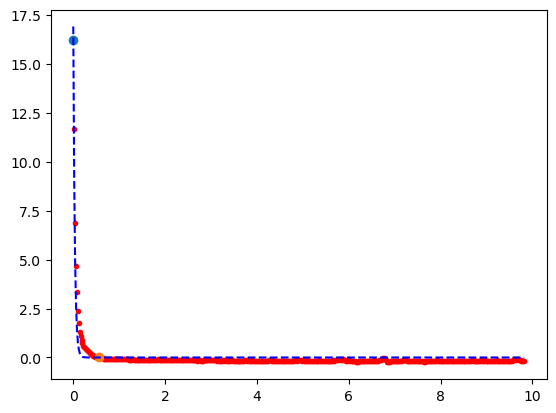

In [42]:
# Data paths
t1r1 = ["./Data/EXP1.2 - TASK1/rate_1_trial_1.csv", "./Data/EXP1.2 - TASK1/rate_1_trial_2.csv", "./Data/EXP1.2 - TASK1/rate_1_trial_3.csv"]
t1r2 = ["./Data/EXP1.2 - TASK1/rate_2_trial_1.csv", "./Data/EXP1.2 - TASK1/rate_2_trial_2.csv", "./Data/EXP1.2 - TASK1/rate_2_trial_3.csv"]
t1r3 = ["./Data/EXP1.2 - TASK1/rate_3_trial_1.csv", "./Data/EXP1.2 - TASK1/rate_3_trial_2.csv", "./Data/EXP1.2 - TASK1/rate_3_trial_3.csv"]

curve = np.loadtxt(t1r2[1], delimiter=",", skiprows=7, usecols=[1,2])

a = 1.4 * (1/1000)
K_chromel = 4.91 * 10**-6
K_alumel = 7.25 * 10**-6
K_avg = np.array([K_chromel, K_alumel]).mean()
tau = (a**2) / (K_avg * np.pi**2)
T0 = curve[0:50, 1].mean()
print(tau)

def T(t):
    return T0 * np.exp(-t / tau)

start_idx = np.diff(curve[:, 1]).argmin() - 1
tol = 0.01
end_idx = np.asarray(abs(curve[:, 1]) < tol).nonzero()[0][0]


plt.plot(curve[start_idx:, 0] - curve[start_idx, 0], curve[start_idx:, 1], ".r")
plt.plot(curve[start_idx, 0] - curve[start_idx, 0], curve[start_idx, 1], 'o')
plt.plot(curve[end_idx, 0] - curve[start_idx, 0], curve[end_idx, 1], 'o')
plt.plot(curve[start_idx:, 0] - curve[start_idx, 0], T(curve[start_idx:, 0] - curve[start_idx, 0]), "--b")
plt.show()